# Import the libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data 

In [12]:
df=pd.read_csv(r'C:\Users\sn767\OneDrive\Desktop\datasets\Bengaluru_House_Data.csv')

In [13]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [14]:
df.shape

(13320, 9)

In [15]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [16]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [18]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [19]:
df[['bath','balcony','price']].corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


<AxesSubplot:>

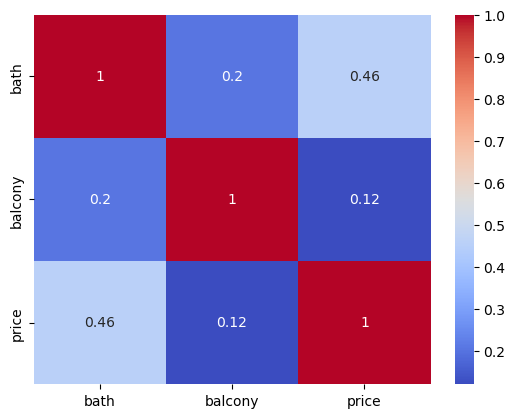

In [20]:
sns.heatmap(df[['bath','balcony','price']].corr(),cmap='coolwarm',annot=True)

In [21]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [22]:
for i in df.columns:
    print(df[i].value_counts())
    print('***'*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
************************************************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
************************************************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, 

In [23]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [24]:
df.shape

(13320, 9)

# Dropping some features which are not need for our model building

In [25]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [26]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [27]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [29]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [30]:
df['location']=df['location'].fillna('Sarjapur  Road')

# Data cleaning : Handling all the null values


In [31]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [32]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [33]:
df['size']=df['size'].fillna('2 BHK')

In [34]:
df.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [35]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [36]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature Enginnering

# Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [37]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [38]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bhk'>

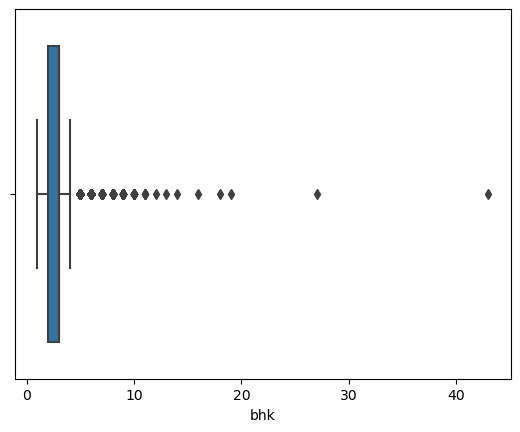

In [39]:
sns.boxplot(df['bhk'])

In [40]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


# Explore total_sqft feature

In [41]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Convert total sqft feature into integer some values 

In [42]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [43]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [44]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


# Doing Feature Engineering Adding price per sqiare feet

In [45]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [46]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [47]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# Dimentaninality Reduction
 

#   Any location having less than 11 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns thus reducing the complexity of the dataset

In [48]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [49]:
df['location'].value_counts().index[1].strip()

'Sarjapur  Road'

In [50]:
df['location']=df['location'].apply(lambda x:x.strip())

In [51]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [52]:
location=df['location'].value_counts()

In [53]:
location_10=location[location<11]

In [54]:
location_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [55]:
df['location']=df['location'].apply(lambda x : 'other' if x in location_10 else x)

In [56]:
df['location'].value_counts()

other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

# Outlier Detection

In [57]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

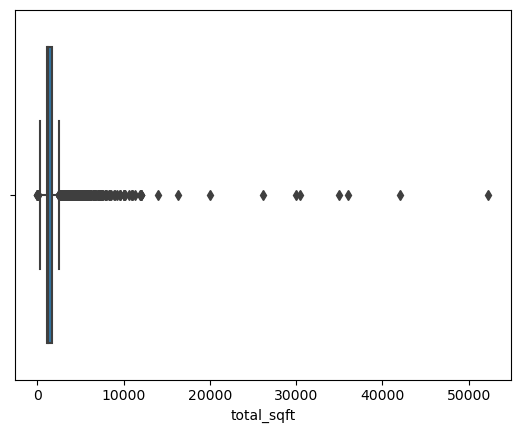

In [58]:
sns.boxplot(df['total_sqft'])

In [59]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [60]:
df['sqft_bhk']=df['total_sqft']/df['bhk']

In [61]:
len(df)

13320

In [62]:
df=df[df['sqft_bhk']>300]

In [63]:
13320-12348

972

In [64]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.00
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.00
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.00
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,690.60
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111,900.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,570.50
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,1172.25


In [65]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft,sqft_bhk
count,12348.000000,12348.000000,12348.000000,12348.000000,12348.000000,12348.000000
mean,1601.084689,2.542274,110.823169,2.633301,6207.869136,602.190472
std,1268.788019,1.065177,152.794399,0.964402,4047.666274,388.747806
min,340.000000,1.000000,8.440000,1.000000,267.829813,301.000000
25%,1115.000000,2.000000,49.000000,2.000000,4200.000000,497.666667
50%,1305.000000,2.000000,69.475000,3.000000,5264.632169,564.500000
75%,1708.000000,3.000000,115.000000,3.000000,6825.108836,632.625000
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235,26136.000000


In [66]:
df['location'].value_counts().index

Index(['other', 'Whitefield', 'Sarjapur  Road', 'Electronic City',
       'Kanakpura Road', 'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal',
       'Marathahalli',
       ...
       'Mahalakshmi Layout', 'HAL 2nd Stage', 'Kodigehalli',
       'Vishveshwarya Layout', 'Thyagaraja Nagar', 'Vishwapriya Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', 'Banjara Layout',
       'Marsur'],
      dtype='object', length=242)

# Remove outlier

# Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [67]:
def remove_outlier_sqft(df):
    df_output=pd.DataFrame()
    print(df_output)
    for key,subdf in df.groupby('location'):
        #print(subdf.price_per_sqft.mean())
        m=subdf.price_per_sqft.mean()
        s=subdf.price_per_sqft.std()
        gendf=subdf[(subdf.price_per_sqft>=(m-s))& (subdf.price_per_sqft<=(m+s))]
        #print(gendf)
        df_output=pd.concat([df_output,gendf],ignore_index=True)
        #print(df_output)
    #print(df_output)
    return df_output
data=remove_outlier_sqft(df)
#print(data)

Empty DataFrame
Columns: []
Index: []


In [68]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft,sqft_bhk
count,10118.000000,10118.000000,10118.000000,10118.000000,10118.000000,10118.000000
mean,1509.315671,2.462443,91.024475,2.562661,5628.030937,586.289700
std,881.261099,0.965923,86.519382,0.879841,2214.103481,216.750143
min,350.000000,1.000000,10.000000,1.000000,1250.000000,303.000000
25%,1110.000000,2.000000,49.000000,2.000000,4242.424242,500.000000
50%,1290.000000,2.000000,67.000000,2.000000,5166.666667,563.000000
75%,1650.000000,3.000000,100.000000,3.000000,6399.255361,626.500000
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922,10030.000000


In [69]:
data[data['location']=='1st Block Jayanagar']['bhk'].value_counts().sort_index()

2    1
3    3
4    3
Name: bhk, dtype: int64

In [70]:
data[data['location']=='1st Block Jayanagar']

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,712.500000
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,543.333333
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,625.000000
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,400.000000
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,617.500000
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818,687.500000
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163,612.500000


<AxesSubplot:>

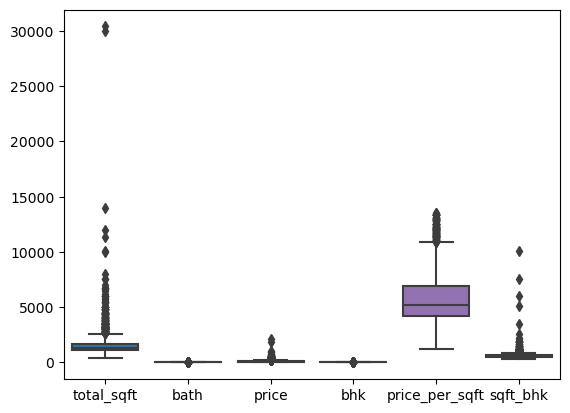

In [71]:
sns.boxplot(data=data[data['location']=='other'])

In [72]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860,712.500000
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491,543.333333
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333,625.000000
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333,400.000000
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668,617.500000
...,...,...,...,...,...,...,...,...
10113,other,2 BHK,1353.0,2.0,110.00,2,8130.081301,676.500000
10114,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443,812.000000
10115,other,3 BHK,1440.0,2.0,63.93,3,4439.583333,480.000000
10116,other,2 BHK,1075.0,2.0,48.00,2,4465.116279,537.500000


In [73]:
def bhk_outlier_remover(h):
    exclude_index=np.array([])
    for location,location_df in h.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std' :np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_index=np.append(exclude_index,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return h.drop(exclude_index,axis='index')

In [74]:
data=bhk_outlier_remover(data)

In [75]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,712.500000
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,543.333333
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,625.000000
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,400.000000
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,617.500000
...,...,...,...,...,...,...,...,...
10109,other,2 BHK,1200.0,2.0,70.0,2,5833.333333,600.000000
10110,other,1 BHK,1800.0,1.0,200.0,1,11111.111111,1800.000000
10113,other,2 BHK,1353.0,2.0,110.0,2,8130.081301,676.500000
10114,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443,812.000000


In [76]:
data.drop(columns=['size','price_per_sqft','sqft_bhk'],inplace=True)

In [77]:
data

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10109,other,1200.0,2.0,70.0,2
10110,other,1800.0,1.0,200.0,1
10113,other,1353.0,2.0,110.0,2
10114,other,812.0,1.0,26.0,1


In [78]:
X=data.drop(columns=['price'])

In [79]:
data.to_csv('Cleaned_data.csv')

In [80]:
X

,location,total_sqft,bath,bhk
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
10109,other,1200.0,2.0,2
10110,other,1800.0,1.0,1
10113,other,1353.0,2.0,2
10114,other,812.0,1.0,1


In [81]:
y=data['price']

In [82]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10109     70.0
10110    200.0
10113    110.0
10114     26.0
10117    400.0
Name: price, Length: 7238, dtype: float64

# Import the library for model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
X_train.shape

(5790, 4)

In [86]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [87]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['location'])])

In [88]:
scaler=StandardScaler()

In [89]:
lr=LinearRegression()

In [90]:
pipe=make_pipeline(column_trans,scaler,lr)

In [91]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [92]:
pipe.fit(X_train,y_train)

C:\Users\sn767\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [93]:
pipe.predict(X_test)

array([ 92.10014   , 278.64115562, 114.77396812, ..., 225.02787437,
        58.63724937,  51.49271812])

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
mean_absolute_error(y_test,pipe.predict(X_test))

20.427157048386366

In [96]:
mean_squared_error(y_test,pipe.predict(X_test))

2622.6694458402135

In [97]:
r2_score(y_test,pipe.predict(X_test))

0.8067615878364682

# apply ridge


In [98]:
ridge=Ridge()

In [99]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [100]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [101]:
pipe.fit(X_train,y_train)

C:\Users\sn767\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [102]:
y_pred_ridge=pipe.predict(X_test)

In [103]:
y_pred_ridge

array([ 92.12311196, 278.66797511, 114.84635041, ..., 225.00506164,
        58.35735796,  50.91336566])

In [104]:
r2_score(y_test,y_pred_ridge)

0.8067302100261282

#  Import pickle 


In [105]:
import pickle

In [106]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [107]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))

In [108]:
pipe=pickle.load(open(r'C:\Users\sn767\coding\code\python\RidgeModel.pkl','rb'))

In [109]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])